In [2]:
# # Load the Excel file
# file_path = 'D:/DSPH/fakeData-DSPH.xlsx'
# df = pd.read_excel(file_path)

# # Save to CSV
# csv_path = 'D:/DSPH/fakeData-DSPH.csv'
# df.to_csv(csv_path, index=False)


# # Load the Excel file
# file_path = 'D:/DSPH/fakeData-DSPH.xlsx'

# # Load the Excel file and get the sheet names
# xls = pd.ExcelFile(file_path)
# sheet_names = xls.sheet_names

# # Loop through the sheets and save each as a CSV
# for sheet_name in sheet_names:
#     df = pd.read_excel(file_path, sheet_name=sheet_name)
#     csv_path = f'D:/DSPH/csv/{sheet_name}.csv'
#     df.to_csv(csv_path, index=False)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_ph = pd.read_csv(config['ph'])
df_plaque = pd.read_csv(config['plaque'])
df_gum_bleeding = pd.read_csv(config['gum_bleeding'])

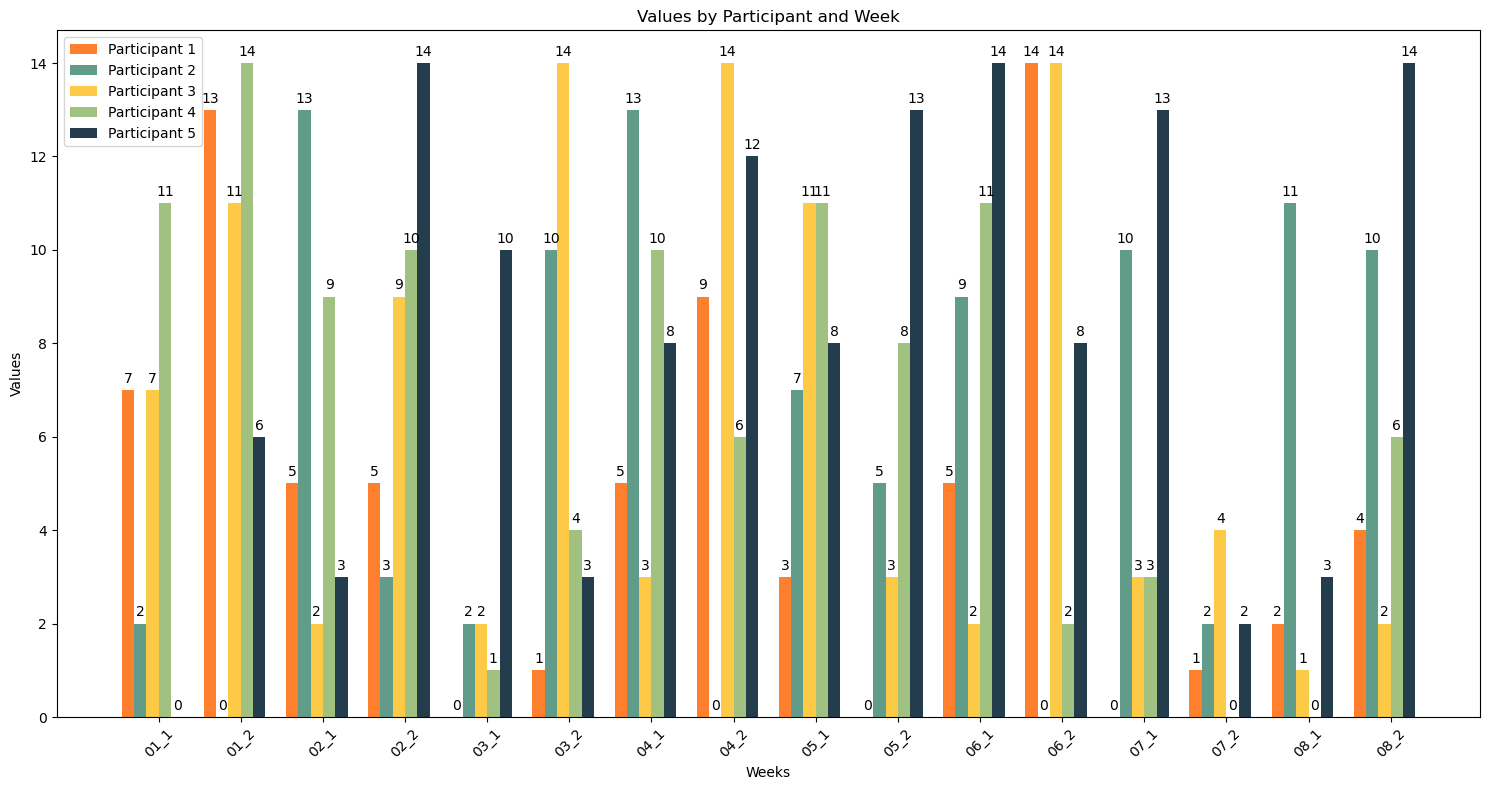

In [4]:
# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

# Assuming df_ph is the correct DataFrame
weeks = df_ph['Weeks']
participants = df_ph.columns[1:]
x = np.arange(len(weeks))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
bars = []

# Correcting the bar positioning
for i, participant in enumerate(participants):
    bars.append(ax.bar(x - (len(participants)*width)/2 + i*width, df_ph[participant], width, label=participant, color=colors[i]))

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Weeks')
ax.set_ylabel('Values')
ax.set_title('Values by Participant and Week')
ax.set_xticks(x)
ax.set_xticklabels(weeks)
ax.legend()

# Adding value labels on top of the bars
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


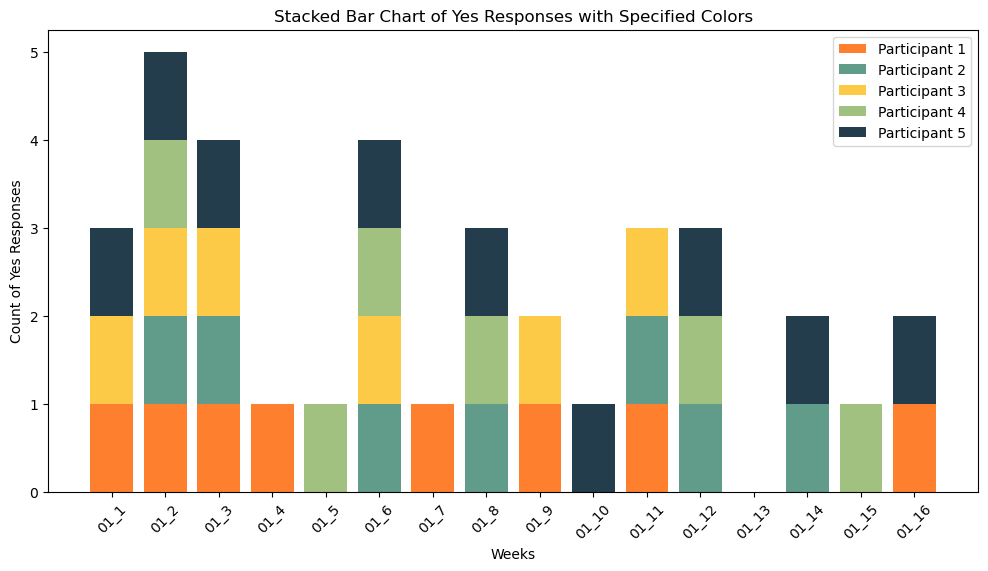

In [5]:

# Converting the Yes/No responses to 1/0
df_gum_bleeding.replace({'Yes': 1, 'No': 0}, inplace=True)

# Initializing an empty dictionary to store the data for each participant
stacked_data = {}
individuals = df_gum_bleeding.columns[1:]  # List of participants
weeks = df_gum_bleeding['Weeks']

# Loop through each participant and extract their responses
for individual in individuals:
    stacked_data[individual] = df_gum_bleeding[individual]

# Create the stacked bar chart with specified colors for each participant
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(weeks))

for i, individual in enumerate(individuals):
    plt.bar(weeks, stacked_data[individual], label=individual, bottom=bottom, color=colors[i])
    bottom += stacked_data[individual]

plt.xlabel('Weeks')
plt.ylabel('Count of Yes Responses')
plt.title('Stacked Bar Chart of Yes Responses with Specified Colors')
plt.legend()
plt.xticks(rotation=45)
plt.show()

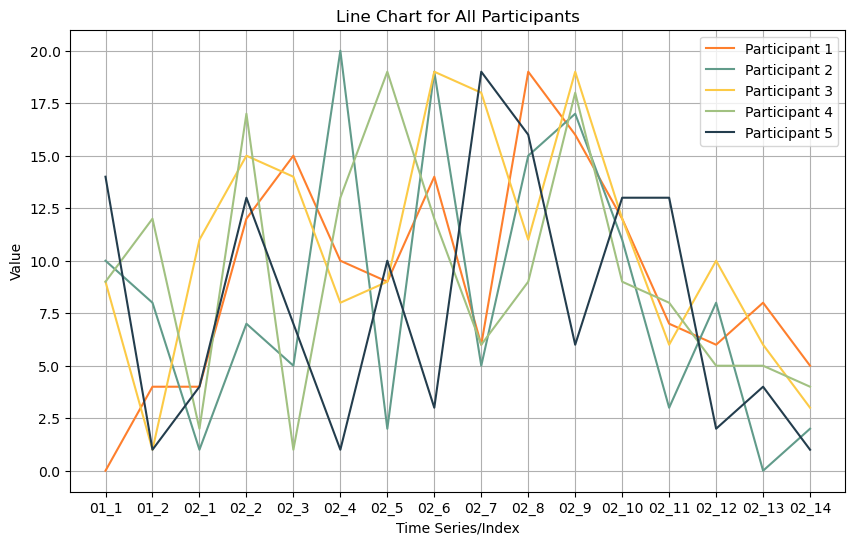

In [6]:
# Assuming the first column contains time series or index values and the rest of the columns are values for participants
time_series = df_plaque.iloc[:, 0]  # First column for the x-axis
participants = df_plaque.columns[1:]  # Remaining columns for participants

def plot_all_participants_on_one_chart(data, time_series, participants, colors):
    plt.figure(figsize=(10, 6))
    for i, participant in enumerate(participants):
        color = colors[i % len(colors)]  # Cycle through colors
        plt.plot(time_series, data[participant], label=participant, color=color)
    plt.title('Line Chart for All Participants')
    plt.xlabel('Time Series/Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage of the function
plot_all_participants_on_one_chart(df_plaque, time_series, participants, colors)

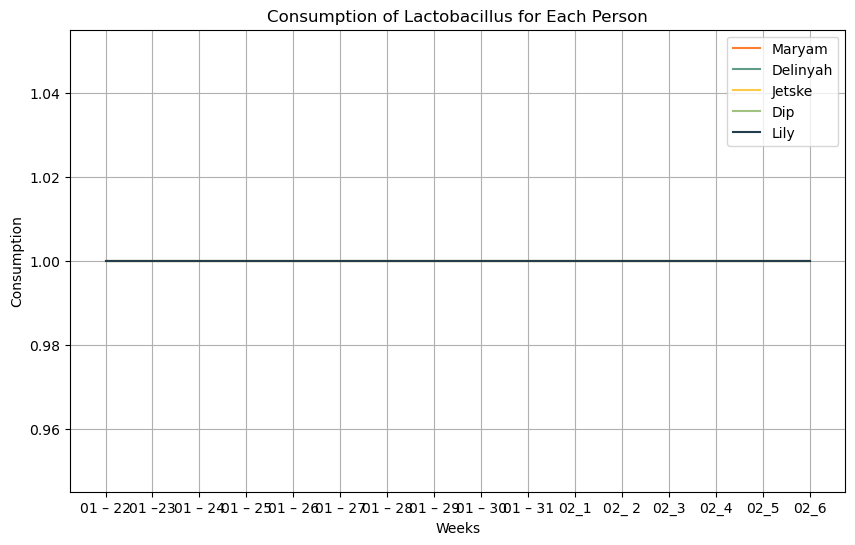

In [7]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Weeks' column to index
df.set_index('Weeks', inplace=True)

# Function to plot consumption of lactobacillus for each person
def plot_lactobacillus_consumption(data):
    time_series = data.index
    participants = data.columns


    plt.figure(figsize=(10, 6))
    for i, participant in enumerate(participants):
        color = colors[i % len(colors)]  # Cycle through colors
        plt.plot(time_series, [1] * len(time_series), label=participant, color=color)  # Plotting a line for each participant
    plt.title('Consumption of Lactobacillus for Each Person')
    plt.xlabel('Weeks')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot consumption of lactobacillus for each person
plot_lactobacillus_consumption(df)
